In [20]:
import pandas as pd
import numpy as np
import arviz as az

In [21]:
df_ethiopia = pd.read_excel(r'alldatasets.xlsx',sheet_name='Ethiopia')

In [22]:
df_ethiopia.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,timeschool,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn,earn_usd
0,ET011003,Ethiopia,157.0,0.0,16.5,1.379536,15.0,9.0,12.0,0,99,7,0.524603,5,1,2000.0,92.032104
1,ET011004,Ethiopia,174.0,NaN,10.0,-0.092591,30.0,10.0,6.0,1,90,8,0.473611,3,1,32000.0,1472.513672
2,ET011009,Ethiopia,155.0,0.0,12.5,1.785974,30.0,14.0,8.0,0,90,13,0.562821,5,1,7000.0,322.112366
3,ET011010,Ethiopia,153.5,0.0,12.0,1.803539,30.0,NaN,NaN,0,91,3,0.320370,5,1,3600.0,165.657791
4,ET011014,Ethiopia,169.0,0.0,10.0,0.893750,45.0,3.0,0.0,1,99,6,0.409259,3,1,43200.0,1987.893433


In [23]:
df_ethiopia.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'timeschool', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1',
       'hhsizer1', 'wi_newr1', 'job_cat', 'pvt_sector', 'earn', 'earn_usd'],
      dtype='object')

In [24]:
from scipy import stats
import scipy.stats as stats

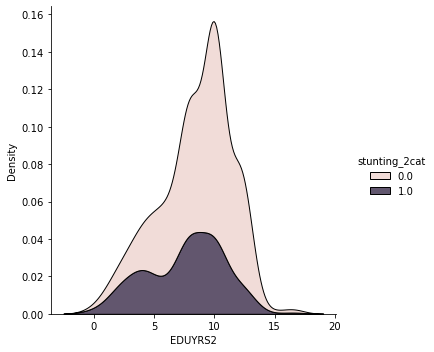

In [25]:
import seaborn as sns
sns.displot(df_ethiopia, x="EDUYRS2", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [26]:
Y = df_ethiopia[['EDUYRS2']]
X = df_ethiopia[['stunting_2cat']]

In [27]:
formula = 'EDUYRS2 ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'EDUYRS2 ~ stunting_2cat'

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=2.2, sigma=10.),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=3)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_ethiopia, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 21 seconds.


In [30]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,8.799,0.154,8.505,9.091,0.003,0.002,3485.0,3485.0,3476.0,3814.0,1.0
stunting_2cat,-1.208,0.270,-1.696,-0.680,0.005,0.003,3429.0,3429.0,3428.0,3974.0,1.0
sd,2.947,0.088,2.793,3.114,0.001,0.001,5456.0,5443.0,5451.0,3402.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

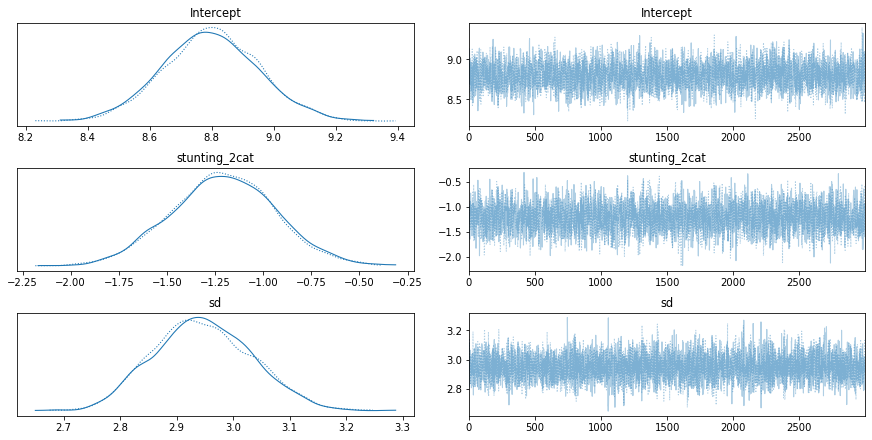

In [31]:
az.plot_trace(normal_trace)

In [32]:
Y = df_ethiopia['EDUYRS2']
X = df_ethiopia[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [33]:
formula = 'EDUYRS2 ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'EDUYRS2 ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=2.2, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=3),
        'agegapr1': pm.Normal.dist(mu=1, sigma=3),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=3),
        'chsexr1': pm.Normal.dist(mu=1, sigma=3),
        'agemonr1': pm.Normal.dist(mu=1, sigma=3),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=3),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=3)
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_ethiopia, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=5000, chains = 2, tune = 5000,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 218 seconds.


In [42]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,11.150,3.186,5.159,17.110,0.043,0.030,5567.0,5463.0,5568.0,5988.0,1.0
stunting_2cat,-0.955,0.269,-1.486,-0.470,0.003,0.002,11306.0,11125.0,11323.0,6992.0,1.0
agegapr1,0.025,0.020,-0.014,0.062,0.000,0.000,9450.0,7377.0,9468.0,7065.0,1.0
momeduyrsr1,0.129,0.050,0.036,0.224,0.001,0.000,8658.0,8388.0,8660.0,7400.0,1.0
chsexr1,-0.790,0.257,-1.257,-0.301,0.003,0.002,9731.0,9430.0,9747.0,7368.0,1.0
agemonr1,-0.032,0.033,-0.094,0.031,0.000,0.000,5555.0,5344.0,5556.0,6097.0,1.0
wi_newr1,6.405,0.804,4.862,7.902,0.009,0.006,7982.0,7897.0,7977.0,7554.0,1.0
hhsizer1,-0.078,0.068,-0.204,0.046,0.001,0.001,12527.0,8672.0,12523.0,7615.0,1.0
sd,2.582,0.088,2.419,2.748,0.001,0.001,12589.0,12508.0,12667.0,7461.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

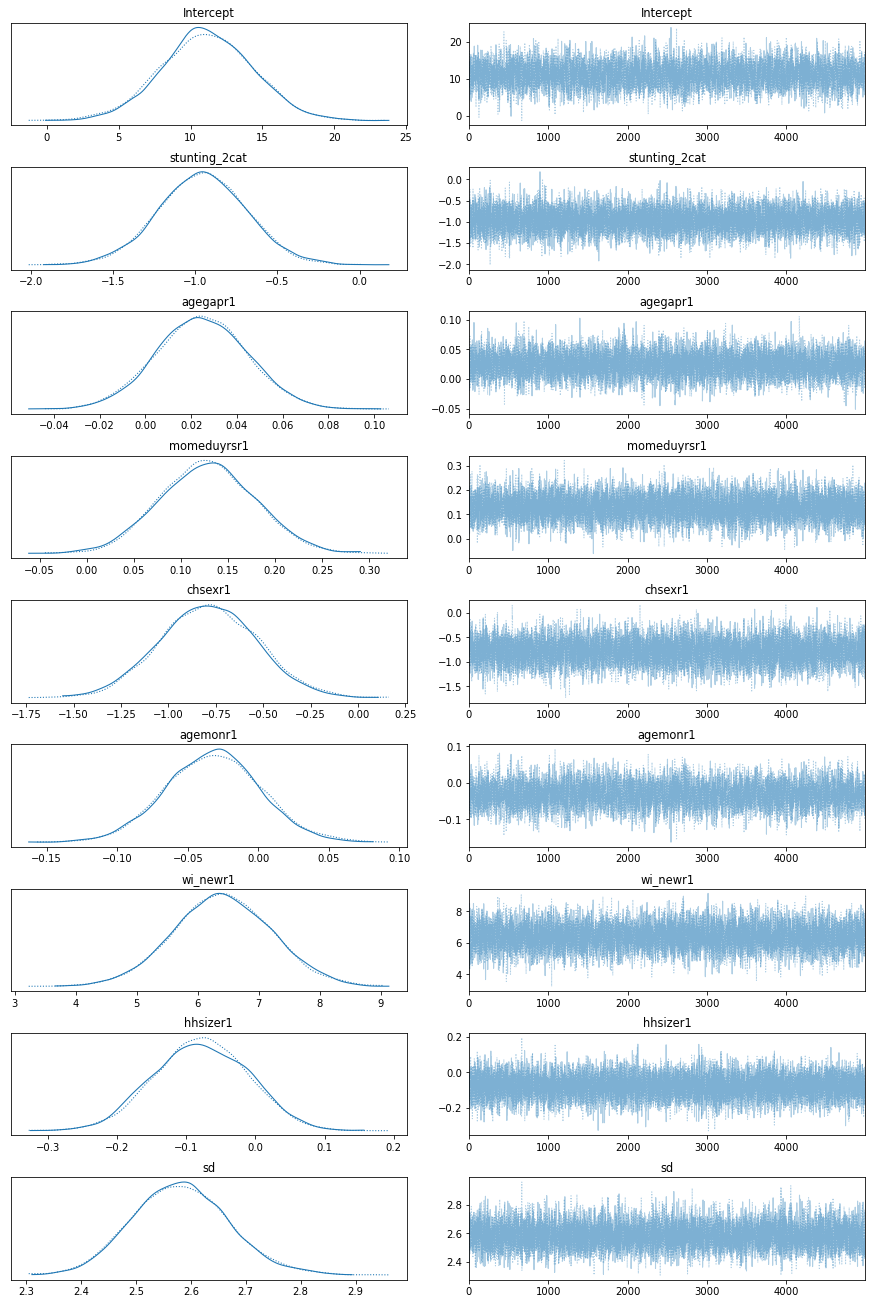

In [43]:
az.plot_trace(normal_trace)

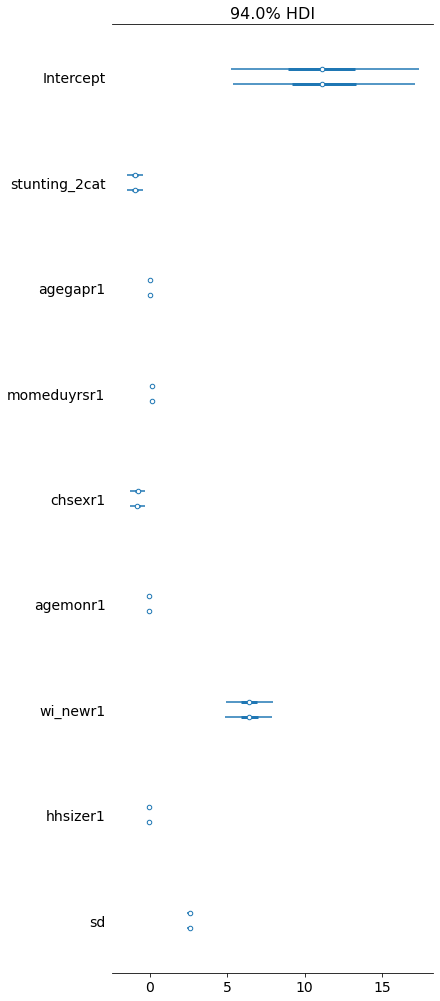

In [44]:
az.plot_forest(normal_trace);